## Analysis Content
1. [introduction](#0)
1. [Python Libraries](#1)
1. [Color Maps](#1.5)
1. [Data Content](#2)
1. [Read Data From APIs](#3)
1. [Disaster Distribution Pie](#4)
1. [Data Wrangling](#5)
1. [Dash App](#6)
1. [Summary](#7)

<a id="0"></a>
# Introduction
In this project, we leverage the Dash framework to build a web application designed for comprehensive analysis of disaster incidents across U.S. states. The application not only examines the frequency and types of disasters occurring in each state but also correlates them with the corresponding federal emergency funding that has been granted. This enables stakeholders to gain insights into the effectiveness of resource allocation and to identify areas in need of additional support. The application incorporates advanced geospatial visualization techniques to provide a more intuitive understanding of the allocation of federal funding and the types of disasters occurring across U.S. states. Utilizing a color-coded map, the intensity of the color signifies either the magnitude of granted federal funding or the frequency of disaster incidents. Users can interactively click on individual states to access detailed data and insights. This Dash-powered platform offers a nuanced and comprehensive view of the disaster landscape and associated federal financial support across different regions of the United States. The datasets we used are Disaster Declarations Summaries and Emergency Management Performance Grants which can be found on https://www.fema.gov/about/openfema/data-sets.
![Image description](https://na.rdcpix.com/54718871/8ecb8b5c10a19ccbe1daba7bc38ec77cw-c297333xd-w640_h480_q80.jpg)

<a id="1"></a>
## Python Libraries

In [1]:
# conda install -c plotly dash-core-components

In [2]:
# conda install dash-html-components

In [1]:
import requests
import json
from matplotlib.colors import LinearSegmentedColormap
import numpy as np
import matplotlib.pyplot as plt
import dash
from dash import Dash, dcc, html, Input, Output
import plotly.express as px
import pandas as pd

<a id="1.5"></a>
## Color Maps
We use 2 customized maps for choropleth maps. One is Tiffany Blue, another is regular red.

In [4]:
custom_tiffany_scale = ['#E0F2F1', '#B2DFDB', '#80CBC4', '#4DB6AC', '#26A69A', '#009688', '#00897B', '#00796B', '#00695C', '#004D40']
custom_red_scale = ['lightcoral', 'darkred']

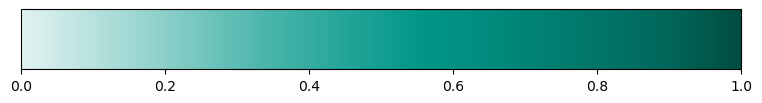

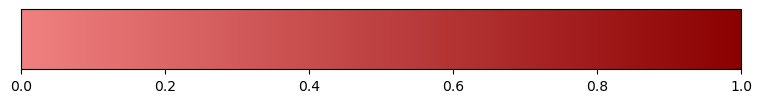

In [5]:
tiffany_cmap = LinearSegmentedColormap.from_list('custom_tiffany_scale', custom_tiffany_scale)
red_cmap = LinearSegmentedColormap.from_list('custom_red_scale', custom_red_scale)

a = np.array([[0,1]])

plt.figure(figsize=(9, 1))
img = plt.imshow(a, cmap=tiffany_cmap)
plt.gca().set_visible(False)
cax = plt.axes([0.1, 0.2, 0.8, 0.6])
plt.colorbar(orientation="horizontal", cax=cax)
plt.figure(figsize=(9, 1))
img = plt.imshow(a, cmap=red_cmap)
plt.gca().set_visible(False)
cax = plt.axes([0.1, 0.2, 0.8, 0.6])
plt.colorbar(orientation="horizontal", cax=cax)
plt.show()

<a id="2"></a>
## Data Content
##### Disaster Declaration Summaries
This dataset provides information on federal disaster declarations, summarized by the U.S. state and the type of incident. Disaster declaration summaries are official statements issued by authorities to formally recognize a situation as a disaster, serving as a legal mechanism to unlock special laws, funds, and resources for response and recovery. These summaries also function as a tool for public awareness and inter-agency coordination, as well as providing official documentation for the scope and scale of the event, which can be critical for future risk assessment and planning. Various types of emergencies, from natural to man-made, can prompt such declarations. The data is sourced from the Federal Emergency Management Agency (FEMA) and includes the following key columns:

1. **state:** The U.S. state where the disaster occurred.
2. **incidentType:** The type of disaster (e.g., Flood, Hurricane, Earthquake, etc.).

##### Emergency Management Performance Grants
Emergency Management Performance Grants (EMPG) are federal grants provided to state and local governments to enhance their emergency management and preparedness capabilities. Administered by the Federal Emergency Management Agency (FEMA), the grants aim to support efforts that help communities effectively prepare for, respond to, and recover from emergencies and disasters. Funding can be used for a range of activities, including planning, training, exercises, and equipment purchases, among other things. The overall objective is to improve the ability of jurisdictions to save lives, protect property, and reduce human suffering during natural and man-made incidents. By providing financial assistance, the EMPG program aims to ensure that state and local agencies have the resources they need to maintain and improve their emergency management operations. The data includes the following key columns:

3. **id:** Unique identifier for each grant.
4. **reportingPeriod:** The period during which the grant was reported.
5. **state:** The U.S. state receiving the grant.
6. **legalAgencyName:** The legal name of the agency receiving the grant.
7. **projectType:** The type of project funded by the grant.
8. **projectStartDate:** The start date of the project.
9. **projectEndDate:** The end date of the project.
10. **nameOfProgram:** The name of the program funded by the grant.
11. **fundingAmount:** The amount of funding provided by the grant.

<a id="3"></a>
## Read Data from APIs

In [2]:

columns = [
    'state', 'incidentType'
]
df_summary = pd.DataFrame(columns=columns)

base_url = https://www.fema.gov/api/open/v1/FemaWebDeclarationAreas

skip = 0
top = 1000
while True:
    url = f"{base_url}?$skip={skip}&$top={top}"
    response = requests.get(url)
    data = json.loads(response.text)
    
    if not data['DisasterDeclarationsSummaries']:
        break
    
    temp_df = pd.DataFrame(data['DisasterDeclarationsSummaries'])
    temp_df = temp_df[columns]
    df_summary = pd.concat([df_summary, temp_df], ignore_index=True)
    
    skip += top

df_summary.head(5)



SyntaxError: invalid syntax (3164607476.py, line 6)

In [ ]:
df_summary.incidentType.sample

In [ ]:

columns = [
    'id', 'reportingPeriod', 'state', 'legalAgencyName', 'projectType',
    'projectStartDate', 'projectEndDate', 'nameOfProgram', 'fundingAmount'
]
df = pd.DataFrame(columns=columns)


base_url = "https://www.fema.gov/api/open/v2/EmergencyManagementPerformanceGrants"


skip = 0
top = 1000  
while True:
    url = f"{base_url}?$skip={skip}&$top={top}"
    response = requests.get(url)
    data = json.loads(response.text)
    
    if not data['EmergencyManagementPerformanceGrants']:
        break 
    
    temp_df = pd.DataFrame(data['EmergencyManagementPerformanceGrants'])
    df = pd.concat([df, temp_df], ignore_index=True)
    
    skip += top  




In [ ]:
df.head()

<a id="4"></a>
## Disaster Distribution Pie

In [ ]:
incident_counts = df_summary['incidentType'].value_counts()

fig = px.pie(
    names=incident_counts.index,
    values=incident_counts.values,
    title='Distribution of Disaster Types in the USA',
    color_discrete_sequence=px.colors.sequential.Plasma,
    hole=0.3,
    template='plotly_white'
)

fig.update_layout(
    width=1000,
    height=800,
    title=dict(
        text='Distribution of Disaster Types in the USA',
        x=0.5,
        y=0.95,
        font=dict(color='#333333', size=20)
    ),
    font=dict(family='monospace'),
    legend=dict(
        x=1,
        y=0.96,
        bordercolor='#444444',
        borderwidth=0,
        tracegroupgap=5
    )
)


fig.show()


<a id="5"></a>
## Data Wrangling

In [ ]:


grouped_df = df.groupby('state').agg(
    total_funding=pd.NamedAgg(column='fundingAmount', aggfunc='sum'),
    total_programs=pd.NamedAgg(column='nameOfProgram', aggfunc='count')
).reset_index()



In [ ]:

grouped_df['total_funding'] = pd.to_numeric(grouped_df['total_funding'], errors='coerce')

In [ ]:
grouped_df.head()

In [ ]:
grouped_df.dtypes

In [ ]:
grouped_df.isnull().sum()

In [ ]:
state_abbrev_dict = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'American Samoa': 'AS',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Guam': 'GU',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Northern Mariana Islands': 'MP',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Puerto Rico': 'PR',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virgin Islands': 'VI',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'
}

grouped_df['state_abbrev'] = grouped_df['state'].map(state_abbrev_dict)


In [ ]:
df_summary.rename(columns={'state': 'state_abbrev'}, inplace=True)


In [ ]:
disaster_count = df_summary.groupby('state_abbrev')['incidentType'].count().reset_index()
disaster_count.columns = ['state_abbrev', 'total_disasters']
grouped_df = pd.merge(grouped_df, disaster_count, on='state_abbrev', how='left')


In [ ]:
grouped_df.head()

<a id="6"></a>
## Dash App

In [ ]:

app = dash.Dash(__name__)

app.layout = html.Div([
    dcc.Dropdown(
        id='indicator-dropdown',
        options=[
            {'label': 'Total Funding', 'value': 'total_funding'},
            {'label': 'Total Disasters', 'value': 'total_disasters'}
        ],
        value='total_disasters'
    ),
    dcc.Graph(id='choropleth-map'),
    dcc.Graph(id='pie-chart', style={'display': 'none'})
])

In [ ]:
@app.callback(
    [Output('choropleth-map', 'figure'),
     Output('pie-chart', 'figure'),
     Output('pie-chart', 'style')],
    [Input('choropleth-map', 'clickData'),
     Input('indicator-dropdown', 'value')]
)
def update_graph(clickData, selected_indicator):
    color_scale = custom_tiffany_scale if selected_indicator == 'total_funding' else custom_red_scale

    fig_map = px.choropleth(
        grouped_df,
        locations='state_abbrev',
        color=selected_indicator,
        locationmode='USA-states',
        scope='usa',
        color_continuous_scale=color_scale
    )

    fig_pie = px.pie()
    pie_style = {'display': 'none'}

    if clickData and 'points' in clickData and len(clickData['points']) > 0:
        state_abbrev = clickData['points'][0].get('location', None)
        if state_abbrev:
            state_name = state_abbrev
            
            if selected_indicator == 'total_disasters':
                pie_data = df_summary[df_summary['state_abbrev'] == state_name]['incidentType'].value_counts()
                fig_pie = px.pie(pie_data, names=pie_data.index, values=pie_data.values)
                pie_style = {'display': 'block'}

            total_value = grouped_df[grouped_df['state_abbrev'] == state_abbrev][selected_indicator].values[0]
            fig_map.update_layout(
                title=f"{selected_indicator} by State (Selected: {state_name}, {selected_indicator}: {total_value})"
            )
            


    return fig_map, fig_pie, pie_style


In [ ]:
if __name__ == '__main__':
    app.run_server(debug=True)

## Summary
After launching the disaster-funding Dash app, we gain a visual and intuitive understanding of both the frequency of disasters affecting each state and the amount of federal emergency funding allocated to them. By interacting with the "Total Disaster" map and clicking on individual states, we can instantly access detailed data on the distribution of different types of disasters affecting each state. By clicking on the "Total Funding" map, we can see the federal emergency funding received by each state. Complementing this, a separate accompanying chart provides insights into the relative prevalence of various disaster types as a percentage of the total number of disasters that have occurred nationwide. 

Following this, we can integrate various data points to analyze the current state of disaster response in each state. For example, if a state like Kentucky has a high proportion of disasters but receives relatively less funding, it may suggest that this state requires more assistance from both the government and society at large. On the other hand, if a state has a lower proportion of disasters but receives more funding, like California, this could mean that the state effectively uses its ample budget for various disaster preparations and has the capacity to mitigate the secondary hazards that accompany disasters. At this point, we may consider whether this state could improve efficiency, maintain its disaster response capabilities while reducing its need for federal funding, and thereby freeing up some budget for other states.

Another scenario that requires consideration is when a state, despite receiving substantial funding, still experiences a high number of disaster declarations. In such cases, it's important to understand the root cause: whether the state still needs more emergency response funding for disaster prevention and relief, or whether the state's use of funds is inefficient. Take Texas, for example; by clicking on Texas in the "Total Disaster" map, we can see that its disaster pie chart is quite similar to other states with fewer disaster declarations. Moreover, the proportion of uncontrollable natural disasters like hurricanes and severe storms is considerably high. Additionally, the proportion of fires in Texas is even lower compared to other areas that perform well in this metric. This suggests that the issue isn't with Texas' efficiency in utilizing funds, but rather its relatively harsh natural environment may be the reason why, despite receiving more funding, it still experiences frequent disasters.

Beyond analyzing the allocation and efficiency of federal funding, the information provided by this app can offer even greater value. Insurance companies can use the "Total Disaster" map to determine the specific services and corresponding prices of insurance products they offer in different regions, based on the proportion of each type of disaster. Companies selling emergency supplies can also use the data from the "Total Disaster" map to decide what types of products to pre-stock in local warehouses. This could not only reduce the time and cost of logistics but also alleviate the strain on transportation networks during disaster relief efforts. These are economically impactful considerations that are worth exploring.